# 数据可视化和摘要


#### 导入相关工具包

In [6]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from scipy.stats import norm, skew 

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) 


#### 分析wine数据，展示前5行



In [7]:
df = pd.read_csv('wine-reviews/winemag-data_first150k.csv')
df.head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.000,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.000,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.000,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.000,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.000,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [8]:
df.drop(df.columns[0], axis=1, inplace=True)
df

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.000,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.000,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.000,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.000,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.000,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.000,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.000,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.000,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.000,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.000,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


## 数据摘要

#### 不同列各个取值的频数

In [9]:
# 不同变量的不同取值的频数
columns = ['country', 'designation', 'province', 'region_1', 'region_2', 'variety', 'winery']
for column in columns:
    print(df[column].value_counts())
    print('-' * 50)

US                        62397
Italy                     23478
France                    21098
Spain                      8268
Chile                      5816
Argentina                  5631
Portugal                   5322
Australia                  4957
New Zealand                3320
Austria                    3057
Germany                    2452
South Africa               2258
Greece                      884
Israel                      630
Hungary                     231
Canada                      196
Romania                     139
Slovenia                     94
Uruguay                      92
Croatia                      89
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       52
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia                       14
Morocco                      12
Luxembou

#### 最大、最小、均值、中位数、四分位数



In [10]:
df.describe()

,points,price
count,150930.000,137235.000
mean,87.888,33.131
std,3.222,36.323
min,80.000,4.000
25%,86.000,16.000
50%,88.000,24.000
75%,90.000,40.000
max,100.000,2300.000


**points特征最大值为100，最小值为80，均值为87.88，中位数为88，第一四分位数为86，第三四分位数为90**

**price特征最大值为2300，最小值为4，均值为33.13，中位数为24，第一四分位数为16，第三四分位数为40**



#### 缺失值的个数



In [11]:
# 缺失值的个数
df.isnull()[['points', 'price']].sum()

points        0
price     13695
dtype: int64

**points缺失值个数为0**

**price缺失值个数为13695**



## 检验是否符合正态分布


 mu = 87.89 and sigma = 3.38



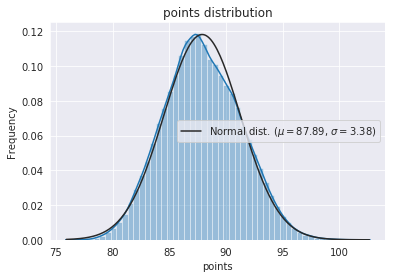

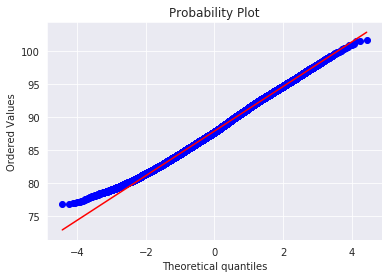

In [12]:
points = df['points'].apply(lambda x: x + np.random.normal())
sns.distplot(points, fit=norm);
mu, sigma = norm.fit(points)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=${:.2f}, $\sigma=${:.2f})'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('points distribution')

#Q-Q图
fig = plt.figure()
res = stats.probplot(points, plot=plt)
plt.show()

#### 通过柱状图和QQ图，分析points是符合正态分布




 mu = 33.13 and sigma = 36.34



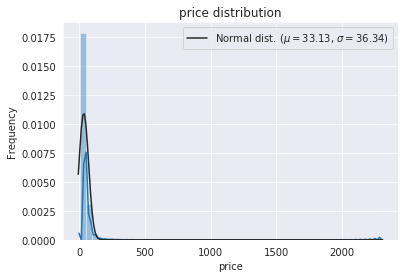

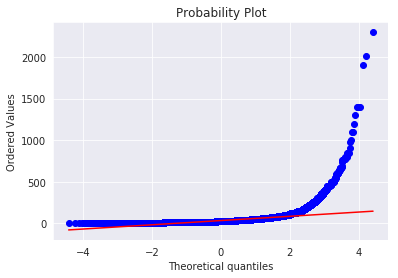

In [13]:
price = df['price'].dropna()
price = price.apply(lambda x: x + np.random.normal())
sns.distplot(price, fit=norm);
mu, sigma = norm.fit(price)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=${:.2f}, $\sigma=${:.2f})'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('price distribution')

#Q-Q图
fig = plt.figure()
res = stats.probplot(price, plot=plt)
plt.show()

#### 通过柱状图和QQ图，分析price是符合正态分布



# 盒图绘制

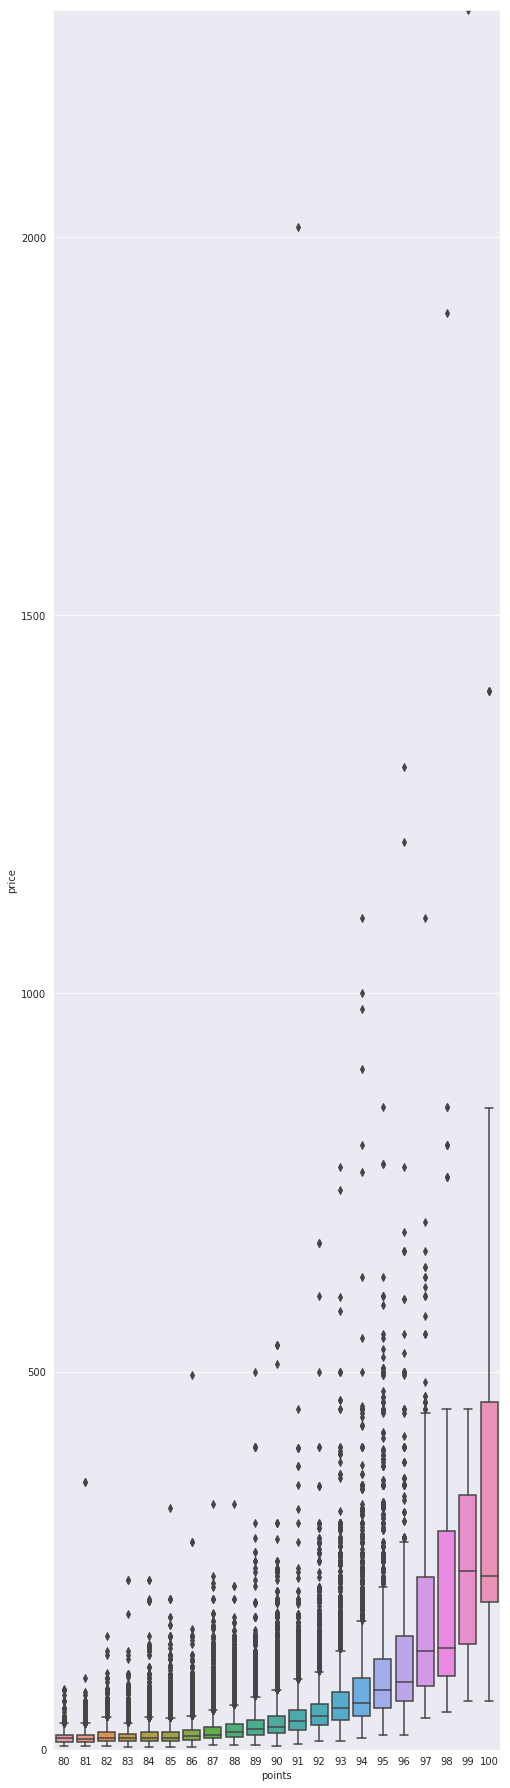

In [14]:
var = 'points'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 32))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=2300);

# 数据缺失的处理


## 缺失值分析

In [15]:
all_data_na = (df.isnull().sum() / len(df)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio':all_data_na})
missing_data

,Missing Ratio
region_2,59.615
designation,30.302
region_1,16.604
price,9.074
province,0.003
country,0.003


Text(0.5,1,'Percent missing data of feature')

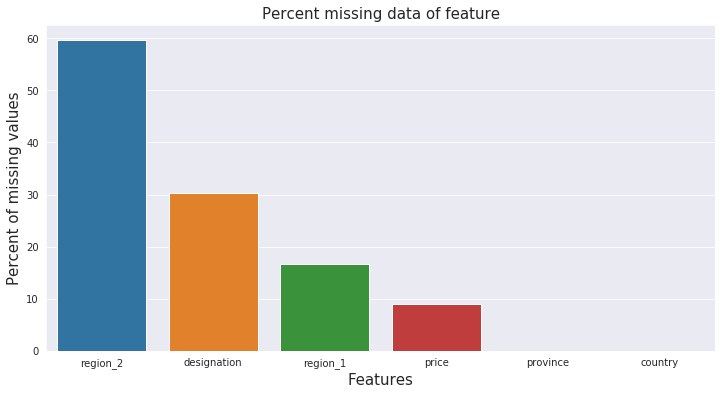

In [16]:
fig = plt.figure(figsize=(12, 6))
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data of feature', fontsize=15)

In [17]:
df.isnull().sum()

country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

#### 缺失值信息如下：

coutry列有5个缺失

designation有45735条缺失

price有13695条缺失

province有5条缺失

region_1有25060条缺失

region_2有89977条缺失

In [18]:
df[df['country'].isnull()]

,country,description,designation,points,price,province,region_1,region_2,variety,winery
1133,NaN,Delicate white flowers and a spin of lemon pee...,Askitikos,90,17.000,NaN,NaN,NaN,Assyrtiko,Tsililis
1440,NaN,"A blend of 60% Syrah, 30% Cabernet Sauvignon a...",Shah,90,30.000,NaN,NaN,NaN,Red Blend,Büyülübağ
68226,NaN,"From first sniff to last, the nose never makes...",Piedra Feliz,81,15.000,NaN,NaN,NaN,Pinot Noir,Chilcas
113016,NaN,"From first sniff to last, the nose never makes...",Piedra Feliz,81,15.000,NaN,NaN,NaN,Pinot Noir,Chilcas
135696,NaN,"From first sniff to last, the nose never makes...",Piedra Feliz,81,15.000,NaN,NaN,NaN,Pinot Noir,Chilcas


可以发现，country信息缺失的数据同时也缺失province和region_1,region_2数据，对这五条数据直接进行删除

In [19]:
df.drop(df[df['province'].isnull()].index, inplace=True)

In [20]:
df[df['designation'].isnull()]

,country,description,designation,points,price,province,region_1,region_2,variety,winery
36,France,Gingery spice notes accent fresh pear and melo...,NaN,90,60.000,Rhône Valley,Châteauneuf-du-Pape,NaN,Rhône-style White Blend,Clos de L'Oratoire des Papes
37,Italy,"Aromas of forest floor, violet, red berry and ...",NaN,90,29.000,Tuscany,Vino Nobile di Montepulciano,NaN,Sangiovese,Avignonesi
38,Italy,"This has a charming nose that boasts rose, vio...",NaN,90,23.000,Tuscany,Chianti Classico,NaN,Sangiovese,Casina di Cornia
48,Italy,"Ripe dark-skinned berry, forest floor and cook...",NaN,90,50.000,Tuscany,Brunello di Montalcino,NaN,Sangiovese,Brunelli Martoccia
49,US,"The aromas of blue fruit, herbs and spice are ...",NaN,90,40.000,Washington,Red Mountain,Columbia Valley,Cabernet Sauvignon,Canvasback
51,France,"This structured, complex Chardonnay is packed ...",NaN,90,68.000,Burgundy,Chassagne-Montrachet,NaN,Chardonnay,Chartron et Trébuchet
54,US,There's a lot to like in this nicely priced wh...,NaN,90,18.000,California,Russian River Valley,Sonoma,Chardonnay,De Loach
61,Australia,Moorooduc's estate Pinot Noir is a solid value...,NaN,91,36.000,Victoria,Mornington Peninsula,NaN,Pinot Noir,Moorooduc
64,Portugal,"This is a super-ripe, still very young wine. I...",NaN,91,23.000,Alentejano,NaN,NaN,Portuguese Red,Herdade do Rocim
71,US,This wine draws from a handful of tremendous v...,NaN,91,45.000,California,Sonoma Coast,Sonoma,Pinot Noir,Red Car


In [21]:
df['designation'].value_counts()

Reserve                                            2752
Reserva                                            1810
Estate                                             1571
Barrel sample                                      1326
Riserva                                             754
Barrel Sample                                       639
Brut                                                624
Crianza                                             503
Estate Grown                                        449
Estate Bottled                                      396
Dry                                                 374
Old Vine                                            331
Gran Reserva                                        330
Brut Rosé                                           248
Extra Dry                                           244
Vieilles Vignes                                     225
Bien Nacido Vineyard                                195
Rosé                                            

### 将缺失部分剔除
缺失数据较多，如果按照最高频率的值来填补，则严重影响数据的有效性，因此选择剔除

In [22]:
df['designation'] = df['designation'].fillna('None')
df.isnull().sum()

country            0
description        0
designation        0
points             0
price          13695
province           0
region_1       25055
region_2       89972
variety            0
winery             0
dtype: int64

### 通过属性的相关关系来填补缺失值
price与points大致成正比，我们将其填补为与其评分相同的其他红酒的平均价钱

In [23]:
df['price'] = df.groupby('points')['price'].transform(lambda x : x.fillna(x.mean()))
df.isnull().sum()

country            0
description        0
designation        0
points             0
price              0
province           0
region_1       25055
region_2       89972
variety            0
winery             0
dtype: int64

### 用最高频率值来填补缺失值
将region_1填充为出现频率最高的值

In [24]:
df['region_1'].value_counts().index[0]

'Napa Valley'

In [25]:
df['region_1'] = df['region_1'].fillna(df['region_1'].value_counts().index[0])

In [26]:
df.isnull().sum()

country            0
description        0
designation        0
points             0
price              0
province           0
region_1           0
region_2       89972
variety            0
winery             0
dtype: int64

### 直接填补
region_2代表生产场地，不适用其他方法处理，因此直接填充为null

In [27]:
df['region_2'] = df['region_2'].fillna('None')

In [28]:
all_data_na = (df.isnull().sum() / len(df)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio':all_data_na})
missing_data

,Missing Ratio


#### 数据集所有列的缺失值为0

